In [1]:
import pandas as pd 

In [2]:
ls 

2024-05-14__scrape-city-council-meetings.ipynb
2024-05-16__scrape-articles.ipynb


In [4]:
domain = 'https://alextimes.com/'

In [5]:
from urllib.parse import urlencode, urlparse, urlunparse, parse_qs, urljoin
def clean_url(to_get_url):
    return urljoin(to_get_url, urlparse(to_get_url).path)

# Get URLS

## alexandria

In [9]:
import requests

In [8]:
alextimes_sitemap = [
    'https://alextimes.com/post-sitemap.xml',
    'https://alextimes.com/post-sitemap2.xml',
    'https://alextimes.com/post-sitemap3.xml',
    'https://alextimes.com/post-sitemap4.xml',
    'https://alextimes.com/post-sitemap5.xml',
    'https://alextimes.com/post-sitemap6.xml',
    'https://alextimes.com/post-sitemap7.xml',
    'https://alextimes.com/post-sitemap8.xml',
    'https://alextimes.com/post-sitemap9.xml',
    'https://alextimes.com/post-sitemap10.xml',
    'https://alextimes.com/post-sitemap11.xml',
    'https://alextimes.com/post-sitemap12.xml',
    'https://alextimes.com/post-sitemap13.xml',
    'https://alextimes.com/post-sitemap14.xml',
    'https://alextimes.com/post-sitemap15.xml',
    'https://alextimes.com/post-sitemap16.xml',
]

In [ ]:
'https://www.alxnow.com/sitemap.xml'

In [ ]:
https://www.alxnow.com/

# Look at getting URLs through WaybackMachine

In [6]:
import requests

In [33]:
start_url = 'http://web.archive.org/cdx/search/cdx?url=alextimes.com/*&limit=10000&showResumeKey=true&output=json&filter=statuscode:200'

In [ ]:
r = requests.get(start_url).json()
resume_key = j[-1][0]

In [36]:
resume_url = f'http://web.archive.org/cdx/search/cdx?url=alextimes.com/*&limit=10000&showResumeKey=true&resumeKey={resume_key}&output=json&filter=statuscode:200'

In [37]:
r2 = requests.get(resume_url).json()

In [53]:
10_000_000 / 10_000

1000.0

In [38]:
r[1]

['com,alextimes)/',
 '20050720004237',
 'http://www.alextimes.com:80/',
 'text/html',
 '200',
 'XSSIIUVLJ3PKGGQPKSP726UGNXIR4OW5',
 '716']

In [39]:
r2[1]

['com,alextimes)/',
 '20220912122157',
 'https://alextimes.com/',
 'text/html',
 '200',
 'KNS6VPN4EMI6U7CH3B4EFLSOEEC5WJ3O',
 '51408']

In [52]:
pd.DataFrame(r[1:-2])

,0,1,2,3,4,5,6
0,"com,alextimes)/",20050720004237,http://www.alextimes.com:80/,text/html,200,XSSIIUVLJ3PKGGQPKSP726UGNXIR4OW5,716
1,"com,alextimes)/",20050930203917,http://www.alextimes.com:80/,text/html,200,DVVEF27EJSVHULWTZWCGHUK2VEH465EM,1006
2,"com,alextimes)/",20060111062510,http://www.alextimes.com:80/,text/html,200,SOQS43FAFSXDOCFDDO2NQXAMRJLDT24D,1365
3,"com,alextimes)/",20060202040831,http://alextimes.com:80/,text/html,200,SOQS43FAFSXDOCFDDO2NQXAMRJLDT24D,1359
4,"com,alextimes)/",20060205100030,http://alextimes.com:80/,text/html,200,SOQS43FAFSXDOCFDDO2NQXAMRJLDT24D,1361
...,...,...,...,...,...,...,...
9995,"com,alextimes)/2008/07/neighbors-in-the-news9234",20231128192806,https://alextimes.com/2008/07/neighbors-in-the...,text/html,200,HFEKQ5GHVJUQETQU7F4JCAGYTAI62Z7S,38550
9996,"com,alextimes)/2008/07/new-voter-campaign-targ...",20230924075157,https://alextimes.com/2008/07/new-voter-campai...,text/html,200,IEAVPAJAZHFDTFIUQ3X5ZI673UUIVWOE,34853
9997,"com,alextimes)/2008/07/news-briefs-barack-obam...",20221006071858,https://alextimes.com/2008/07/news-briefs-bara...,text/html,200,NLLEQW4WBOEUKXUOLHWN3LH32GTUPKS2,37257
9998,"com,alextimes)/2008/07/news-briefs-barack-obam...",20230201091303,https://alextimes.com/2008/07/news-briefs-bara...,text/html,200,6KEWLGVEGXUSKOJKQIMDZEKL7W3PE3TH,36799


# Philadelphia Inquirer

https://www.inquirer.com/arc/outboundfeeds/sitemap/2007-01-01/?outputType=xml
...
https://www.inquirer.com/arc/outboundfeeds/sitemap/2010-09-01/?outputType=xml
https://www.inquirer.com/arc/outboundfeeds/sitemap2/2010-09-02/?outputType=xml
...
https://www.inquirer.com/arc/outboundfeeds/sitemap2/2019-05-18/?outputType=xml
https://www.inquirer.com/arc/outboundfeeds/sitemap3/2019-05-19/?outputType=xml

In [58]:
import requests
import pandas as pd 
from tqdm.auto import tqdm

In [45]:
sitemap_1 = 'https://www.inquirer.com/arc/outboundfeeds/sitemap/{date}/?outputType=xml'
sitemap_2 = 'https://www.inquirer.com/arc/outboundfeeds/sitemap2/{date}/?outputType=xml'
sitemap_3 = 'https://www.inquirer.com/arc/outboundfeeds/sitemap3/{date}/?outputType=xml'

In [50]:
dates_1 = pd.date_range('2007-01-01', '2010-09-01').to_series().reset_index(drop=True).apply(lambda x: sitemap_1.format(date=x.date()))
dates_2 = pd.date_range('2010-09-02', '2019-05-18').to_series().reset_index(drop=True).apply(lambda x: sitemap_2.format(date=x.date()))
dates_3 = pd.date_range('2019-05-19', '2024-05-15').to_series().reset_index(drop=True).apply(lambda x: sitemap_3.format(date=x.date()))

In [77]:
all_dates = pd.concat([
    dates_1, dates_2, 
    dates_3
])

In [78]:
all_urls = []
for d in tqdm(all_dates):
    sitemap_xml = requests.get(d)
    urls = BeautifulSoup(sitemap_xml.content, features='xml').find_all('loc')
    urls = list(map(lambda x: x.get_text(), urls))
    for u in urls:
        all_urls.append({
            'date': d.split('/')[-2],
            'url': u
        })

  0%|          | 0/6345 [00:00<?, ?it/s]

In [79]:
all_urls_df = pd.DataFrame(all_urls)

In [81]:
all_urls_df.to_csv('../data/inquirer-urls-to-get.csv')

<Axes: >

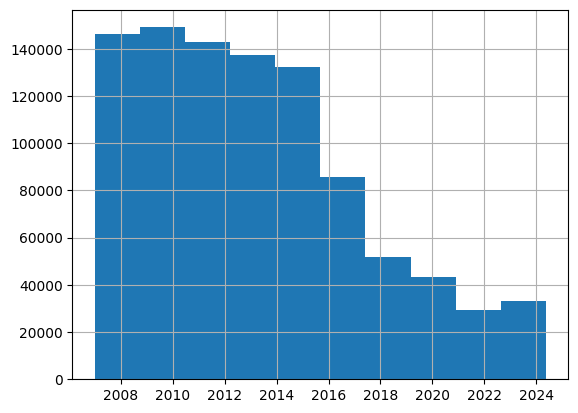

In [87]:
pd.to_datetime(all_urls_df['date']).hist()

In [90]:
all_urls_df['url'].iloc[10]

'https://www.inquirer.com/philly/news/local/20070101_Cheltenham_Township_woman__49__dies_in_fire_1.html'

In [75]:
all_urls_df['url'].drop_duplicates().shape 

(99387,)

In [25]:
"http://web.archive.org/cdx/search/cdx?url=inquirer.com/*&limit=100&showResumeKey=true"

'http://web.archive.org/cdx/search/cdx?url=archive.org&limit=5&showResumeKey=true'

In [92]:
ls ../data/

alexandria/   dallas/       philadelphia/ seattle/
columbus/     newark/       phoenix/


In [ ]:
'alexandria times',      'alextimes.com',    # fetched 
'dallas morning news',   'dallasnews.com',   # fetched 
'philadelphia inquirer', 'inquirer.com',     # fetched 
'seattle times',         'seattletimes.com', # fetching
'columbus dispatch',     'dispatch.com',     # fetching
'newark news',           'nj.com',           # fetching
'Arizona Republic',      'azcentral.com',    # fetched

# Look at Common Crawl URLs

In [3]:
import json
import re 
import glob
import gzip
from tqdm.auto import tqdm
index_files = glob.glob('../data/*/*cc-articles-to-fetch.txt.gz')

In [2]:
all_file_urls = {}
for fp in tqdm(index_files):
    file_urls = []
    name = re.search(r'([^/]+)-cc-articles-to-fetch\.txt\.gz', fp)[1]
    with gzip.open(fp) as f:
        for line in f:
            file_urls.append(line.decode())
    all_file_urls[name] = file_urls

  0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
seen_urls = set()
all_urls = [] 
for name, f in tqdm(all_file_urls.items()):
    for u in f:
        if (u.strip() == '...') or (u.strip() == ''):
            continue
        try:
            u_min_key = u.split()[1:]
            u_min_key = ' '.join(u_min_key)
            bracketed_text = re.search(r'\{.*\}', u_min_key)[0]
            json_dat = json.loads(bracketed_text)
            if json_dat['url'] not in seen_urls:
                seen_urls.add(json_dat['url'])
                json_dat['newspaper'] = name
                all_urls.append(json_dat)
        except:
            print(f'failed on {u}...')

  0%|          | 0/7 [00:00<?, ?it/s]

In [8]:
len(seen_urls)

7250113

In [11]:
import pandas as pd 

In [13]:
all_urls_df = pd.DataFrame(all_urls)

In [15]:
all_urls_df['newspaper'].value_counts()

newspaper
seattle-times          1756947
dallas-morning-news    1437633
star-ledger            1418946
azcentral              1154922
columbus-dispatch       824197
philly-inquirer         389696
alexandria-times        267772
Name: count, dtype: int64

In [3]:
import pandas as pd 
# pd.read_csv('../data/philadelphia/inquirer-urls-to-get.csv')

,Unnamed: 0,date,url
0,0,2007-01-01,https://www.inquirer.com/philly/blogs/inq-blin...
1,1,2007-01-01,https://www.inquirer.com/philly/news/nation_wo...
2,2,2007-01-01,https://www.inquirer.com/philly/entertainment/...
3,3,2007-01-01,https://www.inquirer.com/philly/business/20070...
4,4,2007-01-01,https://www.inquirer.com/philly/opinion/200701...
...,...,...,...
951831,951831,2024-05-15,https://www.inquirer.com/opinion/letters/inqui...
951832,951832,2024-05-15,https://www.inquirer.com/life/dear-abby-this-f...
951833,951833,2024-05-15,https://www.inquirer.com/entertainment/horosco...
951834,951834,2024-05-15,https://www.inquirer.com/news/pennsylvania/chr...
